In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

# import os

# # !pip install fire
# # !pip install tqdm

# home_dir = '/content/gdrive/My Drive/A0/aispace'
# os.chdir(home_dir)
# !pwd

# import os
# # Get the current working directory
# current_directory = os.getcwd()
# print(current_directory)

# import shutil
# import os

In [2]:
# !pip install rasterio
# !pip install accelerate
# !pip install peft
# !pip install transformers
# # !pip install transformers==4.33.0
# !pip install datasets

In [3]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

In [38]:
import json

chkpt_list = [30000, 30000, 30000, 30000, 12000, 9000, 11000]
chkpt_list = [8000, 8000, 8000, 16000, ] #8000, 8000, 13000]
chkpt_list = [32000, 32000, 64000, 32000, 28000, 28000, 28000]    # 32000] # 20000, 4000] #8000, 8000, 13000]

!pwd

learning_rates_all = []
losses_all = []
steps_all = [0,]
for ii, chkpt in enumerate(chkpt_list):  # range(4):
    json_file = f'./A0[optim_sophia]/run[{ii}]/checkpoint-{chkpt}/trainer_state.json'
    # json_file = f'./A0[float]/run[{ii}]/checkpoint-30000/trainer_state.json'
    # json_file = f'./checkpoint-25000/trainer_state.json'
    # Open the JSON file for reading
    with open(json_file, 'r') as json_file:
        data = json.load(json_file)

        display(data['log_history'][-1])


    data = data['log_history']

    # Extract 'learning_rate', 'loss', and 'step' values from the data
    learning_rates = [item['learning_rate'] for item in data]
    losses = [item['loss'] for item in data]
    steps = [item['step'] for item in data]

    learning_rates_all.extend(learning_rates)
    losses_all.extend(losses)

    shift_step = steps_all[-1]
    shifted_steps = [step + shift_step for step in steps]
    steps = shifted_steps
    steps_all.extend(steps)


display(data[0])

steps_all.pop(0)

# print(len(losses_all), len(steps_all), steps_all)

/home


{'epoch': 800.0, 'learning_rate': 0.0002, 'loss': 0.3686, 'step': 32000}

{'epoch': 800.0, 'learning_rate': 0.0002, 'loss': 0.3495, 'step': 32000}

{'epoch': 1600.0,
 'learning_rate': 2.0773437499999954e-06,
 'loss': 0.3231,
 'step': 64000}

{'epoch': 800.0,
 'learning_rate': 2.0742500000000026e-06,
 'loss': 0.3239,
 'step': 32000}

{'epoch': 800.0,
 'learning_rate': 2.07333333333333e-06,
 'loss': 0.3231,
 'step': 28000}

{'epoch': 800.0,
 'learning_rate': 7.000000025666666e-07,
 'loss': 0.3218,
 'step': 28000}

{'epoch': 800.0,
 'learning_rate': 6.6686659999992666e-09,
 'loss': 0.3214,
 'step': 28000}

{'epoch': 5.71,
 'learning_rate': 4.000000000000001e-06,
 'loss': 0.3217,
 'step': 200}

0

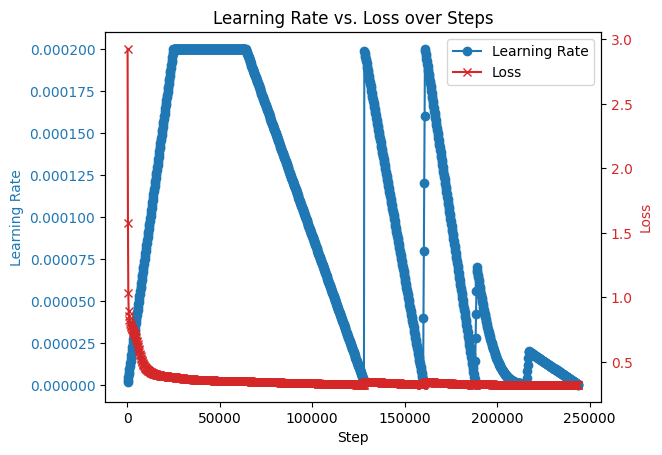

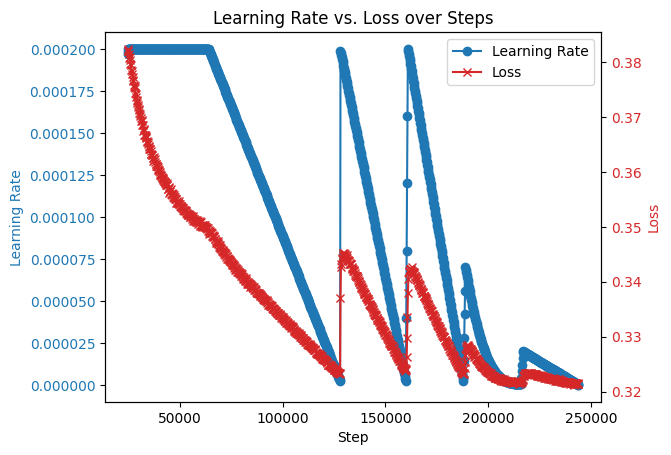

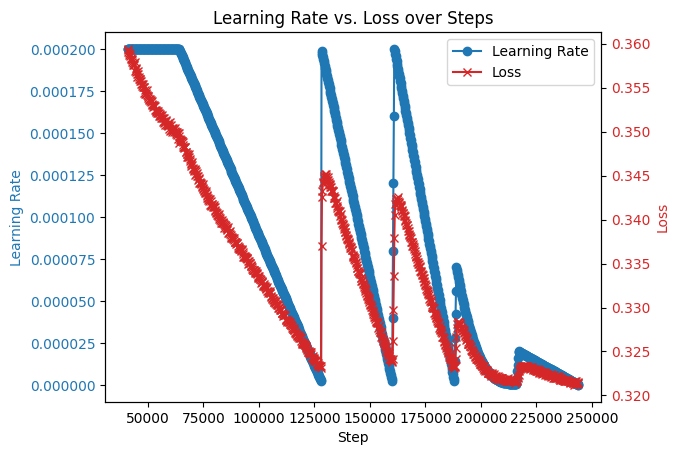

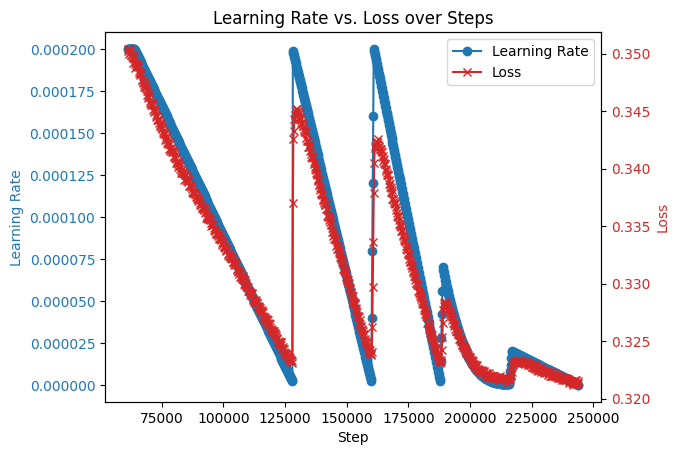

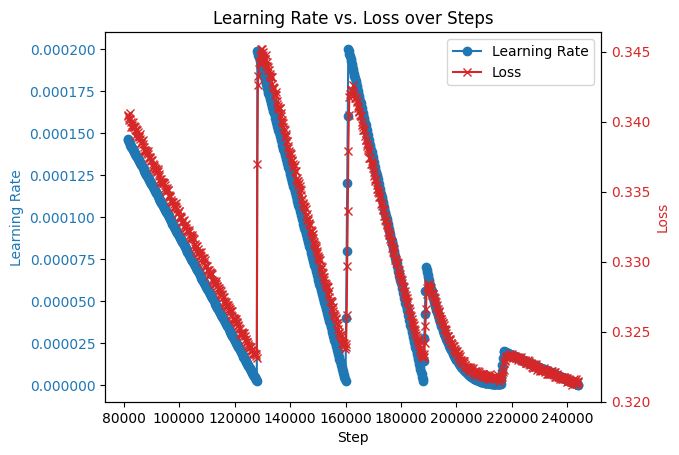

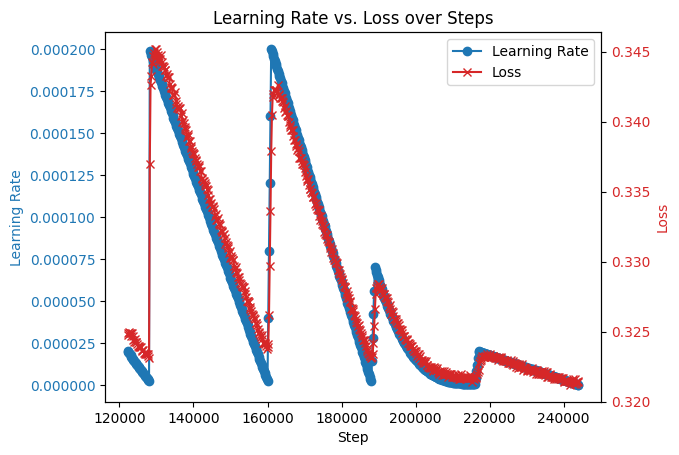

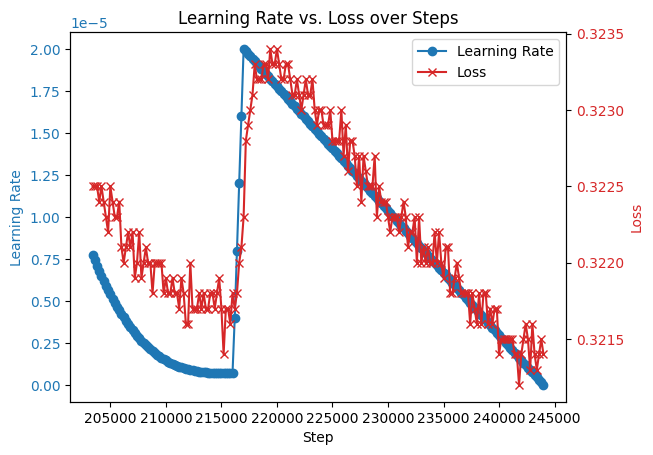

In [39]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# # Your data
# data = [
#     {'epoch': 1.56, 'learning_rate': 3.90625e-06, 'loss': 0.4483, 'step': 200},
#     # Add more data points as needed
# ]

# # Extract 'learning_rate', 'loss', and 'step' values from the data
# learning_rates = [item['learning_rate'] for item in data]
# losses = [item['loss'] for item in data]
# steps = [item['step'] for item in data]
# shift_step = 250001
# # Shift 'step' values
# shifted_steps = [step + shift_step for step in steps]

# steps = shifted_steps

def plot_state(steps_all, learning_rates_all, losses_all):
    # Create a plot with 'step' on the x-axis
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Step')
    ax1.set_ylabel('Learning Rate', color='tab:blue')
    ax1.plot(steps_all, learning_rates_all, color='tab:blue', label='Learning Rate', marker='o')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for 'loss'
    ax2 = ax1.twinx()
    ax2.set_ylabel('Loss', color='tab:red')
    ax2.plot(steps_all, losses_all, color='tab:red', label='Loss', marker='x')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Show the plot
    plt.title('Learning Rate vs. Loss over Steps')
    plt.show()

len_all = len(steps_all)
plot_state(steps_all[:], learning_rates_all[:], losses_all[:])
plot_state(steps_all[len_all//10:], learning_rates_all[len_all//10:], losses_all[len_all//10:])
plot_state(steps_all[len_all//6:], learning_rates_all[len_all//6:], losses_all[len_all//6:])
plot_state(steps_all[len_all//4:], learning_rates_all[len_all//4:], losses_all[len_all//4:])
plot_state(steps_all[len_all//3:], learning_rates_all[len_all//3:], losses_all[len_all//3:])
plot_state(steps_all[len_all//2:], learning_rates_all[len_all//2:], losses_all[len_all//2:])

pos = len_all//2 + len_all//3
plot_state(steps_all[pos:], learning_rates_all[pos:], losses_all[pos:])


[2.9267, 2.9267, 1.5742, 1.0342, 0.8933, 0.8521, 0.825, 0.8075, 0.7941, 0.7843, 0.776, 0.7689, 0.7624, 0.7566, 0.751, 0.7451, 0.7392, 0.7332, 0.7273, 0.721, 0.7141, 0.7071, 0.6998, 0.6913, 0.6821, 0.6723, 0.6615, 0.6502, 0.6379, 0.6262, 0.6134, 0.6008, 0.5883, 0.5761, 0.5638, 0.5529, 0.5423, 0.5314, 0.5219, 0.513, 0.5049, 0.4977, 0.491, 0.4839, 0.4785, 0.473, 0.4685, 0.4634, 0.4595, 0.4553, 0.4517, 0.4485, 0.4443, 0.4419, 0.439, 0.4363, 0.434, 0.4313, 0.4304, 0.4276, 0.4254, 0.4235, 0.4219, 0.4199, 0.4185, 0.4168, 0.4156, 0.4143, 0.413, 0.4119, 0.4102, 0.409, 0.4077, 0.4069, 0.4059, 0.4048, 0.4042, 0.4026, 0.4026, 0.4013, 0.4009, 0.3992, 0.3989, 0.3981, 0.3972, 0.3968, 0.3958, 0.3951, 0.395, 0.3943, 0.3936, 0.3936, 0.3921, 0.3921, 0.3912, 0.391, 0.3906, 0.39, 0.3898, 0.3886, 0.3886, 0.3886, 0.3882, 0.388, 0.3869, 0.3869, 0.3869, 0.3866, 0.3866, 0.3859, 0.3853, 0.3858, 0.3847, 0.3848, 0.384, 0.3842, 0.384, 0.3836, 0.3833, 0.3834, 0.3826, 0.3823, 0.3825, 0.382, 0.3824, 0.382, 0.3815, 0.3

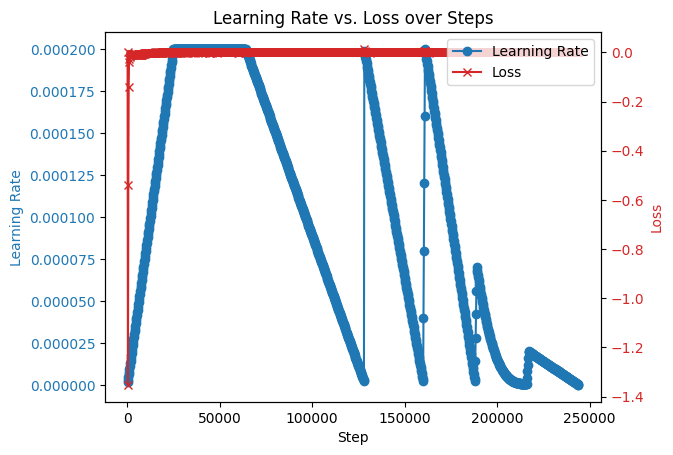

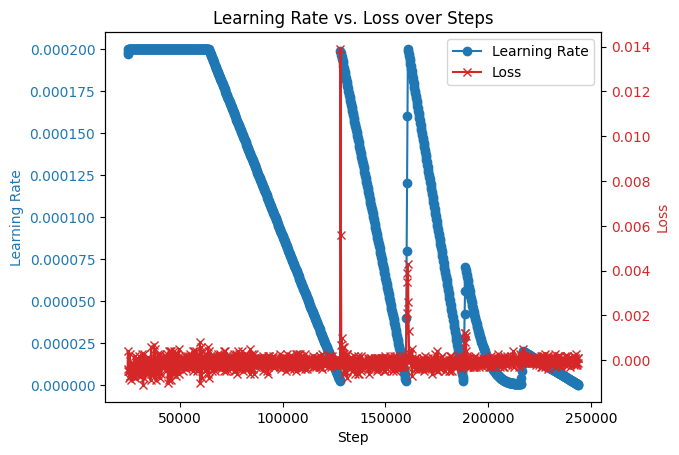

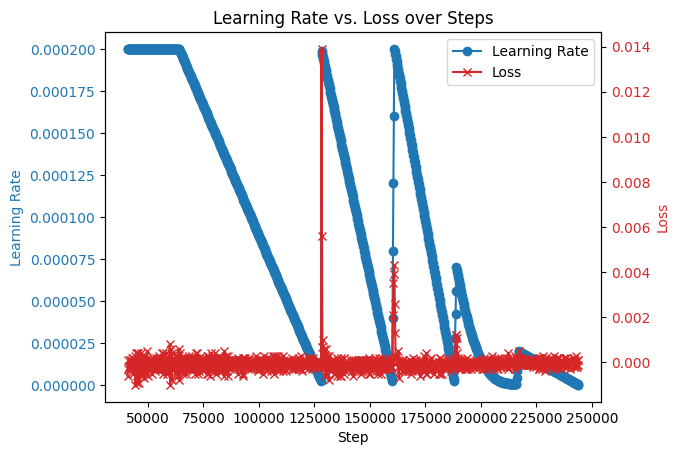

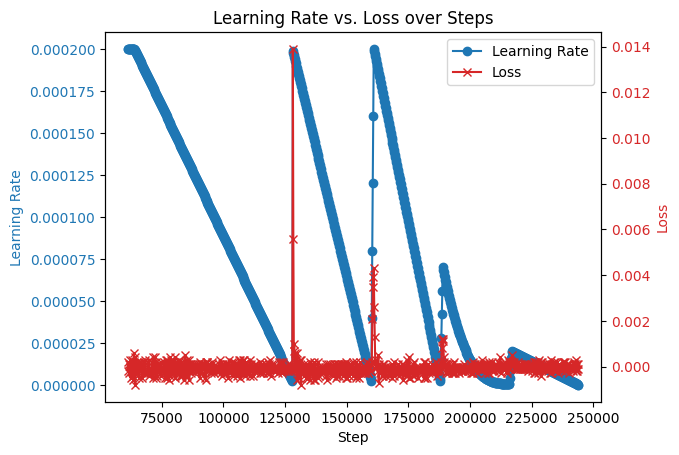

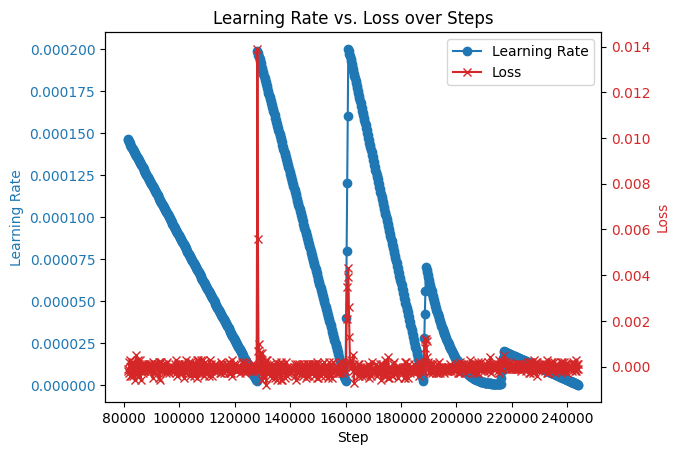

In [40]:
# Specify the number of positions to shift
shift_by = 1

# Shift the list to the right
shifted_list = losses_all[-shift_by:] + losses_all[:-shift_by]
shifted_list[0] = shifted_list[1]

print(shifted_list)
print(losses_all)

losses_all = [a - b for a, b in zip(losses_all, shifted_list)]
# losses_all = shifted_list - losses_all

len_all = len(steps_all)


plot_state(steps_all[:], learning_rates_all[:], losses_all[:])
plot_state(steps_all[len_all//10:], learning_rates_all[len_all//10:], losses_all[len_all//10:])
plot_state(steps_all[len_all//6:], learning_rates_all[len_all//6:], losses_all[len_all//6:])
plot_state(steps_all[len_all//4:], learning_rates_all[len_all//4:], losses_all[len_all//4:])
plot_state(steps_all[len_all//3:], learning_rates_all[len_all//3:], losses_all[len_all//3:])